In [1]:
import sys
sys.path.append("../")
sys.path.append("../../algorithms/ga")

In [2]:
import numpy as np
from datetime import datetime
import tsplib95 as tsp

In [3]:
import matplotlib.pyplot as plt 
from matplotlib.pyplot import cm

In [4]:
from tsp_problem import TSP_Problem
from population import Population
from ga import GA

## Problem (Djibouti)
**(optimal tour for the dj38 TSP has length 6656)**. From http://www.math.uwaterloo.ca/tsp/world/djtour.html

### A function to plot
This function plot the fitness of the solution as a function of the number of iteration

In [11]:
def plot_runs(runs, title="title", figsize=(10, 12)):
    '''
    Plot best_fitness = f(fevals) for 10 runs

    Parameters
    ----------
    - logs: A python list: log of 10 runs for
        an optimisation problem. for each run:
        * logs of a run is run[0]
        * duration of run is run[1]
        * best_fitness of run is run[2]
        * best_solution of run is run[3]
    - title: the title of the plot!
    '''

    # Build the plot
    fig, ax = plt.subplots(figsize=figsize)
    plt.axes(ax)
    colors = iter(cm.rainbow(np.linspace(0, 1, len(runs))))
    run_id = 0
    for run in runs:
        run_id = run_id + 1
        color = next(colors)
        duration = "{0}mn:{1}s".format(run[1].seconds//60,
                                       run[1].seconds % 60)

        run_best_fitness = "{0}".format(run[2])
        iteration_best_fitness = [log[1] for log in run[0]]
        x = np.arange(len(iteration_best_fitness))
        
        plt.plot(x, iteration_best_fitness, "k--", color=color,
                 label="run {0:>2}: {1}, best fitness fit={2}".
                 format(run_id, duration, run_best_fitness))

    # Set y lim if required, title and labels
    ax.set_title(title)
    ax.set_xlabel("number of iteration", fontsize=12)
    ax.set_ylabel("best fitness", fontsize=12)
    ax.legend()

### Loading problem

In [6]:
djibouti = tsp.load("./data/dj38.tsp")

### Let's look at some cities coordinate

In [7]:
djibouti_cities = np.array([djibouti.node_coords[city] for city in list(djibouti.get_nodes())])
djibouti_cities[:2]

array([[11003.6111, 42102.5   ],
       [11108.6111, 42373.8889]])

### Create our TSP problem

In [8]:
djibouti_pb = TSP_Problem("dj38", djibouti_cities)

### Run 10 instances of GA for our problem

In [9]:
population_size = 300
nb_generation = 200
elite_ratio=0
selection_op="tournament"
selection_params={"K": 2}
crossover_op="ordered"
crossover_params={"crossover_proba": 0.9, "sequence_max_width": 10}
mutation_op="scramble"
mutation_params={"mutation_proba": 0.1, "sequence_max_width": 5}

In [10]:
verbose=True
runs = []
for run_id in range(10):
    # re-initialise the problem
    # i.e. to get different (random)
    # initial solution
    solutions = Population(djibouti_pb, population_size)
    algo = GA(solutions, nb_generation=nb_generation, elite_ratio=elite_ratio,
          selection_op=selection_op, selection_params=selection_params,
          crossover_op=crossover_op, crossover_params=crossover_params,
          mutation_op=mutation_op, mutation_params=mutation_params)
    startt = datetime.now()
    algo.run()
    duration = (datetime.now() - startt)
    runs.append([solutions.logs, duration, int(solutions.best_fitness), solutions.best_individual])
    if verbose:
        print("run {0:2} -> duration: {1}mn:{2}s, best_fitness: {3}".
              format(run_id, duration.seconds//60, duration.seconds%60, int(solutions.best_fitness)))

run  0 -> duration: 1mn:11s, best_fitness: 8242
run  1 -> duration: 1mn:11s, best_fitness: 7326
run  2 -> duration: 1mn:11s, best_fitness: 6888
run  3 -> duration: 1mn:14s, best_fitness: 7855
run  4 -> duration: 1mn:11s, best_fitness: 7434
run  5 -> duration: 1mn:11s, best_fitness: 9664
run  6 -> duration: 1mn:11s, best_fitness: 8351
run  7 -> duration: 1mn:12s, best_fitness: 9651
run  8 -> duration: 1mn:13s, best_fitness: 6991
run  9 -> duration: 1mn:12s, best_fitness: 8547


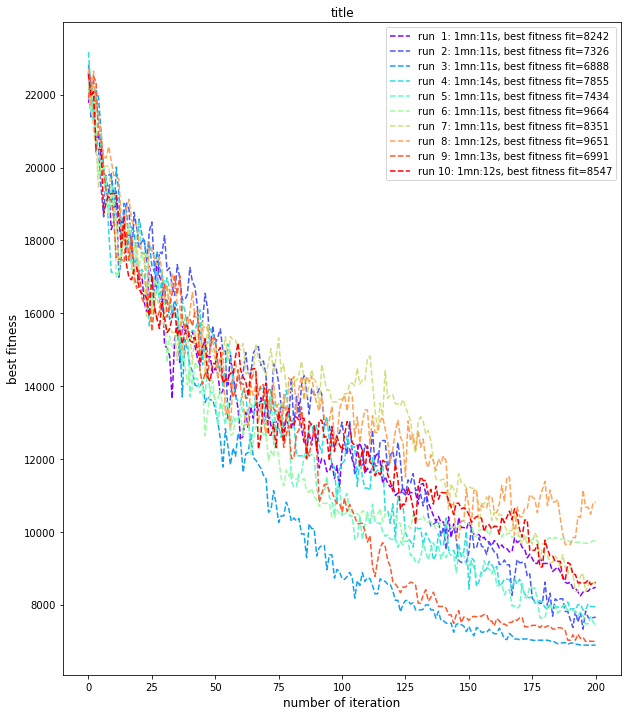

In [12]:
plot_runs(runs, title="title", figsize=(10, 12))

### Get the best overall solution

In [13]:
best_fitness = np.inf
for run in runs:
    if run[2] < best_fitness:
        best_fitness = run[2]
        best_solution = run[3]

In [14]:
path = best_solution.tolist()
path.append(path[0])
print("The best path is : \n{0}".format(path))
print("This path is {0} (distance of unit) long".format(best_fitness))

The best path is : 
[34, 36, 31, 27, 28, 26, 25, 23, 20, 22, 24, 15, 13, 8, 12, 11, 17, 18, 19, 16, 9, 7, 6, 5, 3, 4, 2, 1, 10, 14, 21, 29, 30, 32, 35, 37, 38, 33, 34]
This path is 6888 (distance of unit) long
